# Final Assignment. Statistics for Data Science with Python

## Project case: Boston Housing Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

### Loading the data

In [45]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



### Let's do some Descriptive Statistics and Visualizations to better understand this data

In [46]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


First, let's show a boxplor of "Median value of owner-occupied homes in $1000" to see its range

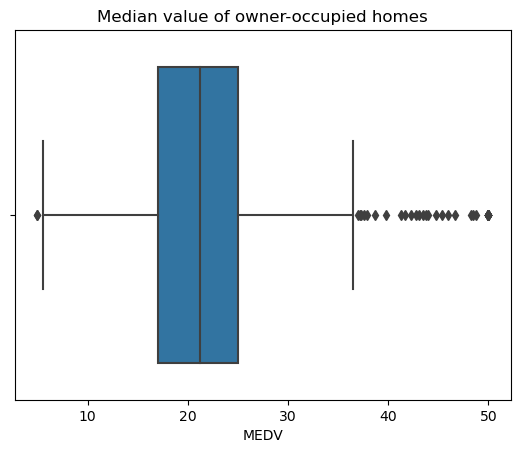

In [47]:

sns.boxplot(x=boston_df.MEDV)
plt.title("Median value of owner-occupied homes")
plt.show()


Here we can observe some outliers, particularly for MEDV>$35 000

Now, we can take a look at the Charles river variable

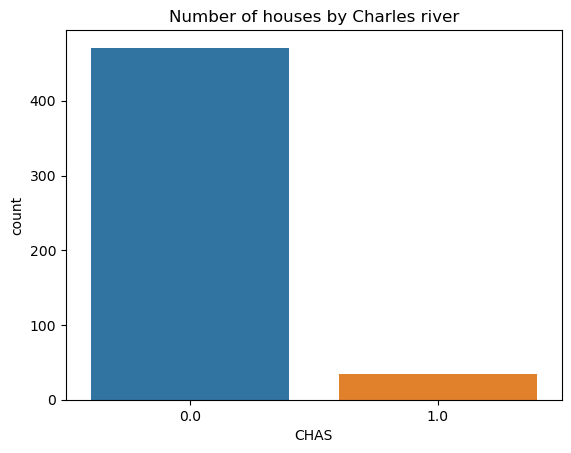

In [48]:
sns.countplot(data=boston_df, x="CHAS")
plt.title("Number of houses by Charles river")
plt.show()

The majority of houses are not near the river.

An interesting plot would be to compare the MEDV variable against the proportion of owner-occupied units built prior to 1940. For that, we will use a boxplot and divide the age variable into three gropus of of 35 years and younger, between 35 and 70 years and 70 years and older)

In [49]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '70 years and older'
boston_df.head(1)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years


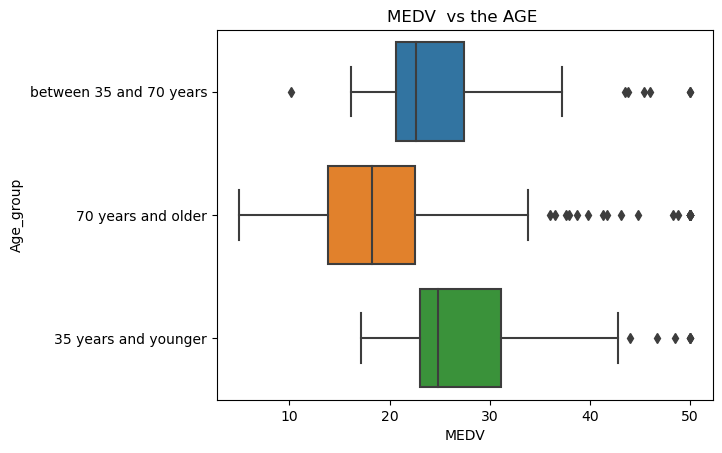

In [50]:
sns.boxplot(x=boston_df.MEDV, y=boston_df.Age_group, data=boston_df)
plt.title("MEDV  vs the AGE ")
plt.show()

We can observe that for youngest owners, the Median value of owner-occupied homes is higher

Here we can see the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

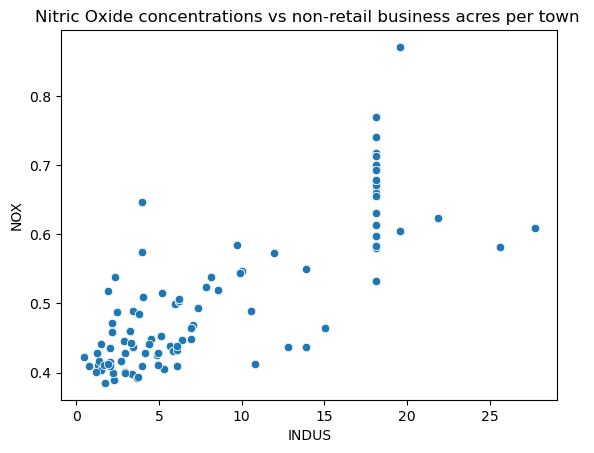

In [51]:
sns.scatterplot(y = boston_df.NOX, x = boston_df.INDUS)
plt.title("Nitric Oxide concentrations vs non-retail business acres per town ")
plt.show()

It appears to be a relation for low  proportion of non-retail business acres per town and lower Nitric Oxide concentrations

Create a histogram for the pupil to teacher ratio variable

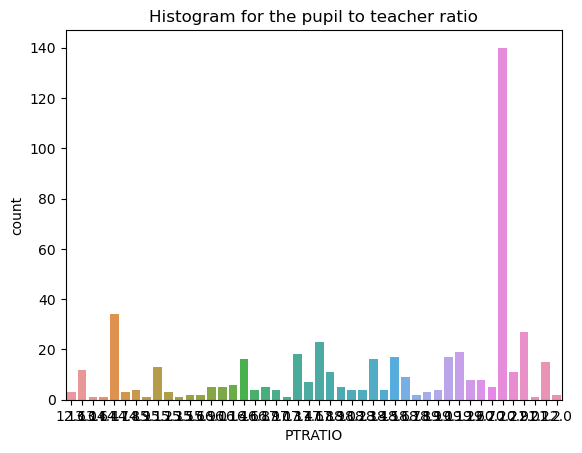

In [52]:
sns.countplot(x = boston_df.PTRATIO)
plt.title("Histogram for the pupil to teacher ratio")
plt.show()

### Now we can answer some questions using statistical tests

#####  In all test we will assume  α = 0.05

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H_0: There is no difference in median value of houses bounded by the Charles river

H_1: There is a difference in median valus of houses bounded by the Charles river

In [53]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [54]:
NotClose=boston_df.loc[(boston_df['CHAS'] == 0), 'MEDV'] 
Close=boston_df.loc[(boston_df['CHAS'] == 1), 'MEDV'] 

In [55]:
scipy.stats.ttest_ind(Close,NotClose,axis=0,equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

We can confidently reject the null hypothesis given the p-value above

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H_0: There is no difference in median value for each proportion of owner occupied units built prior to 1940

H_1: There is a difference in median value for each proportion of owner occupied units built prior to 1940



In [58]:
Young = boston_df[boston_df["Age_group"] == '35 years and younger']["MEDV"]
Between = boston_df[boston_df["Age_group"] == 'between 35 and 70 years']["MEDV"]
Old = boston_df[boston_df["Age_group"] == '70 years and older']["MEDV"]

In [60]:
scipy.stats.f_oneway(Young,Between,Old,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

The p-value is lower than 0.05, so we reject the null hypothesis so we observe a statistically significant difference in median value for each group

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H_0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [62]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])


(0.7636514469209151, 7.913361061238693e-98)

With a p-value less than our threshold, we can reject the null hypothesis and say there is a positive relationship between these two variables

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

H_0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

H_1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [64]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        17:41:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the data above, the Coef for the  weighted distances to five Boston employment centres (DIS) increases 1.0916 the median value of owner occupied homes (MEDV)